In [81]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [82]:
ticker ='MGLU3.SA'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2017-1-1')['Adj Close']

In [83]:
log_returns = np.log(1+data.pct_change())

C:\Users\MathS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [84]:
log_returns.tail()

,MGLU3.SA
Date,
2020-10-20,0.013532
2020-10-21,0.006889
2020-10-22,-0.004587
2020-10-23,-0.012724
2020-10-26,-0.011710


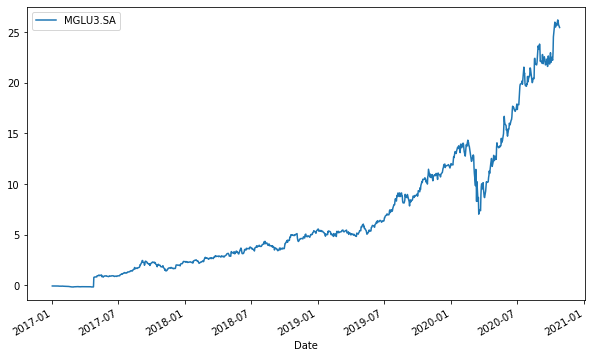

In [85]:
data.plot(figsize=(10,6));

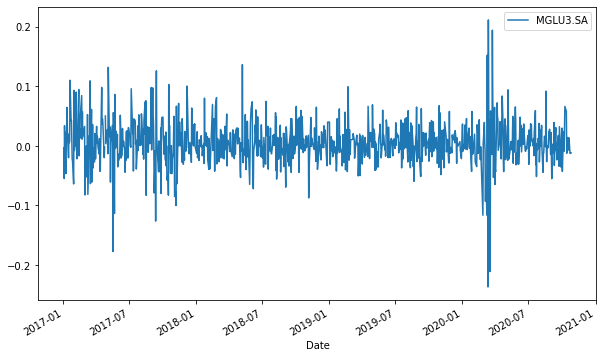

In [86]:
log_returns.plot(figsize=(10,6));

In [87]:
u = log_returns.mean()

In [88]:
u

MGLU3.SA    0.00448
dtype: float64

In [89]:
var = log_returns.var()
var

MGLU3.SA    0.001414
dtype: float64

In [90]:
drift = u - (0.5*var)
drift

MGLU3.SA    0.003773
dtype: float64

In [91]:
stdev = log_returns.std()
stdev

MGLU3.SA    0.037602
dtype: float64

In [45]:
type(drift)

pandas.core.series.Series

In [46]:
type(stdev)

pandas.core.series.Series

In [92]:
drift.values

array([0.00377326])

In [93]:
stdev.values

array([0.03760221])

In [94]:
norm.ppf(0.95)

1.6448536269514722

In [95]:
x = np.random.rand(10,2)
x

array([[0.87067524, 0.87505267],
       [0.57874506, 0.94403591],
       [0.63617145, 0.25682896],
       [0.56610335, 0.3283837 ],
       [0.83448284, 0.51166519],
       [0.06122752, 0.4028932 ],
       [0.91705392, 0.66763534],
       [0.77717146, 0.58574674],
       [0.84589117, 0.59482369],
       [0.87814691, 0.49499574]])

In [96]:
norm.ppf(x)

array([[ 1.12958882,  1.15060529],
       [ 0.19868407,  1.58958587],
       [ 0.3482438 , -0.65315258],
       [ 0.16646212, -0.44438066],
       [ 0.97203262,  0.02924447],
       [-1.54455047, -0.24586544],
       [ 1.38552447,  0.43339296],
       [ 0.76267528,  0.21661742],
       [ 1.01896904,  0.23997115],
       [ 1.16577315, -0.01254416]])

In [97]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 1.00715725,  0.22474779],
       [-0.94682552,  0.89264399],
       [ 0.4167144 ,  0.56446382],
       [ 0.15094913, -1.54441714],
       [-0.89189371,  0.27159247],
       [ 0.69367289,  1.13270242],
       [ 1.41417075, -1.50908793],
       [ 0.04876412,  0.26852244],
       [ 1.48540603,  0.8033458 ],
       [-0.13918906, -0.22660247]])

In [98]:
t_intervals = 1000
iterations = 10

In [99]:
#calculando o futuro
daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.95457201, 0.95932809, 1.00229938, ..., 0.97750282, 0.93536895,
        0.95935811],
       [1.04816917, 0.97295683, 0.93383342, ..., 0.97654264, 0.99638912,
        1.03355839],
       [0.9168663 , 1.03326866, 1.07173756, ..., 0.9877541 , 1.07098137,
        1.02951618],
       ...,
       [1.0606914 , 0.97365585, 1.03055257, ..., 0.9753433 , 0.98731305,
        0.9756721 ],
       [1.01350082, 1.00481393, 0.9710994 , ..., 0.93097417, 0.96594589,
        1.01391546],
       [1.07131393, 1.02400288, 0.98143614, ..., 0.97003709, 1.02607785,
        1.04268215]])

In [55]:
s0 = data.iloc[-1]
s0

OIBR3.SA    1.65
Name: 2020-10-26 00:00:00, dtype: float64

In [56]:
price_list = np.zeros_like(daily_returns)

In [57]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
price_list[0] = s0
price_list

array([[1.64999998, 1.64999998, 1.64999998, ..., 1.64999998, 1.64999998,
        1.64999998],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [60]:
price_list

array([[1.64999998e+00, 1.64999998e+00, 1.64999998e+00, ...,
        1.64999998e+00, 1.64999998e+00, 1.64999998e+00],
       [7.54927563e-01, 1.25805372e+00, 1.86886102e+00, ...,
        1.40685223e+00, 1.03621384e+00, 1.39534074e+00],
       [1.55334449e+00, 1.24733400e+00, 1.47632359e+00, ...,
        2.24702310e+00, 1.54188673e+00, 1.47145623e+00],
       ...,
       [3.98259614e-60, 9.13907309e-57, 2.16903929e-58, ...,
        9.18934786e-65, 5.66458670e-46, 3.05349182e-56],
       [1.44595159e-60, 4.33836608e-57, 4.57512562e-58, ...,
        4.94541321e-65, 4.63627108e-46, 2.03241504e-56],
       [1.39629549e-60, 3.18893216e-57, 2.10774391e-58, ...,
        1.73796353e-65, 7.22789148e-46, 1.13586361e-56]])

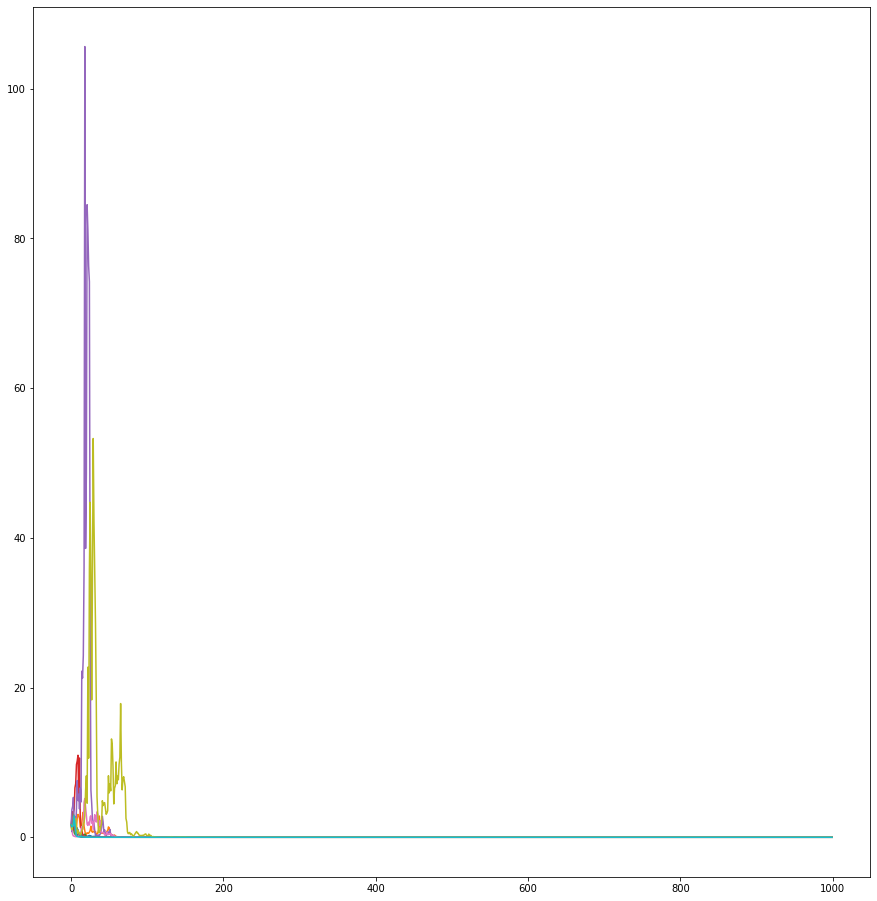

In [64]:
plt.figure(figsize=(15,16))
plt.plot(price_list)